In [123]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
from functions import bhz_ham, chern_marker

import numpy as np
from matplotlib import pyplot as plt

This code makes the Hamiltonian

$
H = \sum_{\textbf r}
\left [ 
    \epsilon_\textbf r c^\dag_r c_r
    +
    t_x c^\dag_{r+\hat x} c_r
    +
    t_y c^\dag_{r+\hat y} c_r
\right ]
$

with 

$
t_x = B \sigma_z \otimes \mathbb 1
    - i \frac {A} {2} \sigma_x \otimes s_z
     + i\frac \alpha 2 \mathbb 1 \otimes s_y
$

$
t_y = B \sigma_z \otimes \mathbb 1
    + i \frac {A} {2} \sigma_y \otimes \mathbb 1
     + i\frac \alpha 2 \sigma_z \otimes s_x
$

$
\epsilon_{\textbf r} = 
(\Delta - 4B) \sigma_z \otimes \mathbb 1
    + \begin{pmatrix}
        w_s & 0\\
        0 & w_p
    \end{pmatrix}\otimes \mathbb 1
$


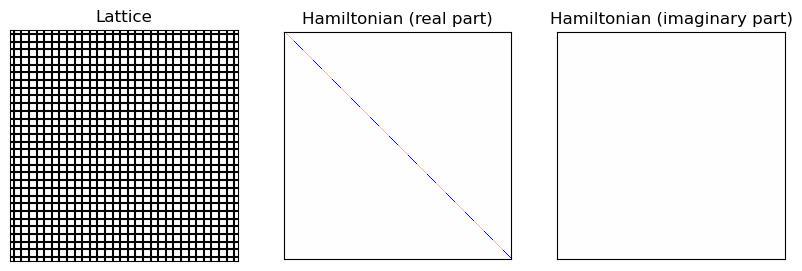

In [ ]:
from koala import example_graphs as eg
from koala.voronization import generate_lattice
from koala import plotting as pl
from koala.lattice import Lattice

size = 30

square_lat = eg.square_lattice(size, size)

params = {
    "A": 1,
    "B": 1,
    "Delta": 2,
    "alpha": 0.0,
    "ws_vals": 0 * np.random.rand(square_lat.n_vertices) * 2 - 1,
    "wp_vals": 0 * np.random.rand(square_lat.n_vertices) * 2 - 1,
}

hamiltonian = bhz_ham(square_lat, **params)


#### plotting ####
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
pl.plot_edges(square_lat, ax=ax[0])
ax[1].matshow(
    hamiltonian.real,
    cmap="bwr",
    clim=(-np.max(np.abs(hamiltonian.real)), np.max(np.abs(hamiltonian.real))),
)
ax[2].matshow(
    hamiltonian.imag,
    cmap="bwr",
    clim=(-np.max(np.abs(hamiltonian.real)), np.max(np.abs(hamiltonian.real))),
)

for a in ax:
    a.set_xticks([])
    a.set_yticks([])

ax[0].set_title("Lattice")
ax[1].set_title("Hamiltonian (real part)")
ax[2].set_title("Hamiltonian (imaginary part)")

plt.show()

Text(0.5, 1.0, 'Energy Spectrum')

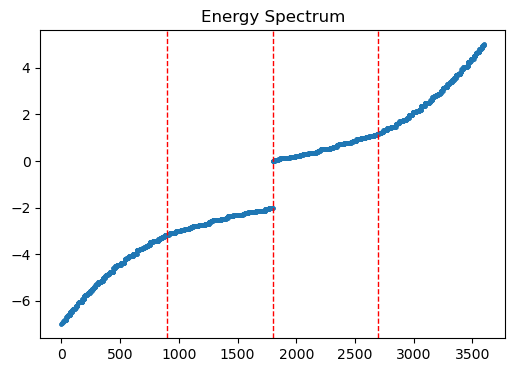

In [126]:
from scipy import linalg as la

e, v = la.eigh(hamiltonian)

fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(range(len(e)), e, s=5)
ax.axvline(len(e) // 4, color="red", ls="--", linewidth=1)
ax.axvline(len(e) // 2, color="red", ls="--", linewidth=1)
ax.axvline(3 * len(e) // 4, color="red", ls="--", linewidth=1)

ax.set_title("Energy Spectrum")

In [127]:
full_proj = v @ np.diag(e < 0) @ v.conj().T
spin_up = np.kron(
    np.eye(2),
    np.array([[1, 0], [0, 0]]),
)
spin_down = np.kron(
    np.eye(2),
    np.array([[0, 0], [0, 1]]),
)

su = np.kron(np.eye(square_lat.n_vertices), spin_up)
sd = np.kron(np.eye(square_lat.n_vertices), spin_down)

p_up = su @ full_proj @ su
p_down = sd @ full_proj @ sd

Text(0.5, 1.0, 'Chern marker (spin down)')

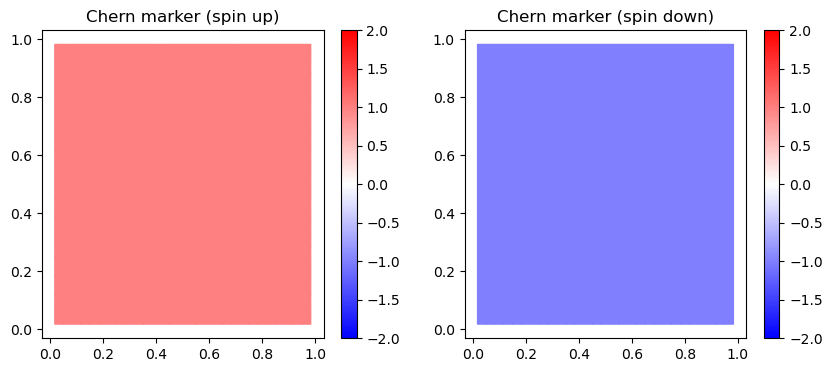

In [ ]:
c_up = chern_marker(square_lat, p_up, True)
c_down = chern_marker(square_lat, p_down, True)

x_vals = square_lat.vertices.positions[:, 0]
y_vals = square_lat.vertices.positions[:, 1]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
c1 = ax[0].tripcolor(
    x_vals, y_vals, c_up, shading="gouraud", cmap="bwr", vmin=-2, vmax=2
)
c2 = ax[1].tripcolor(
    x_vals, y_vals, c_down, shading="gouraud", cmap="bwr", vmin=-2, vmax=2
)

fig.colorbar(c1, ax=ax[0])
fig.colorbar(c2, ax=ax[1])

ax[0].set_title("Chern marker (spin up)")
ax[1].set_title("Chern marker (spin down)")

In [ ]:
spin_bott = np.average((c_up - c_down) / 2)

print(f"The spin bott index is: {spin_bott}")

The spin bott index is: 0.99999965283943


In [ ]:
# make a Hadamard rotation in spin space

hadamard = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])
hadamard = np.kron(np.eye(2), hadamard)
hadamard = np.kron(np.eye(square_lat.n_vertices), hadamard)

p_up_hadamard = su @ hadamard @ full_proj @ hadamard @ su
p_down_hadamard = sd @ hadamard @ full_proj @ hadamard @ sd

c_up_hadamard = chern_marker(square_lat, p_up_hadamard, True)
c_down_hadamard = chern_marker(square_lat, p_down_hadamard, True)

Text(0.5, 1.0, 'Chern marker (spin down)')

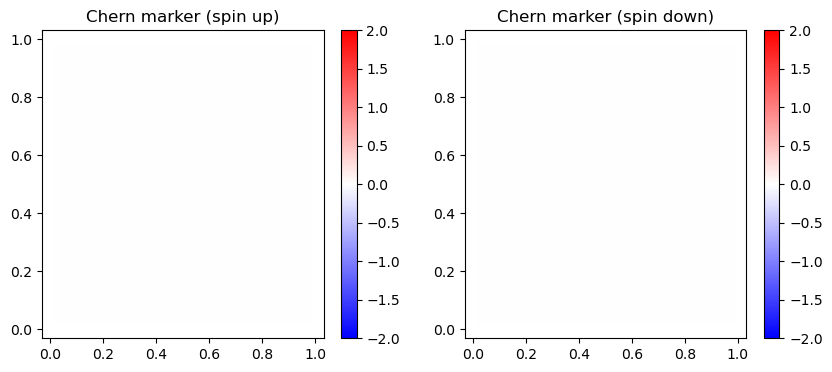

In [138]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
c1 = ax[0].tripcolor(
    x_vals, y_vals, c_up_hadamard, shading="gouraud", cmap="bwr", vmin=-2, vmax=2
)
c2 = ax[1].tripcolor(
    x_vals, y_vals, c_down_hadamard, shading="gouraud", cmap="bwr", vmin=-2, vmax=2
)

fig.colorbar(c1, ax=ax[0])
fig.colorbar(c2, ax=ax[1])

ax[0].set_title("Chern marker (spin up)")
ax[1].set_title("Chern marker (spin down)")

In [139]:
spin_bott_hadamard = np.average((c_up_hadamard - c_down_hadamard) / 2)
print(f"The spin bott index is: {spin_bott_hadamard}")

The spin bott index is: -2.6055055746055203e-18
